In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jason wang\AppData\Local\Temp\ipykernel_37292\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# SP500, Stocks Ex us, WTI, Bonds, Reits
import yfinance as yf
gold = yf.download('GC=F', end='2024-08-27', interval='1mo')['Close']
sp500 = yf.download('^GSPC', end='2024-08-27', interval='1mo')['Close']
efa = yf.download('EFA', end='2024-08-27', interval='1mo')['Close']
wti = yf.download('CL=F', end='2024-08-27', interval='1mo')['Close']
bond = yf.download('ZB=F', end='2024-08-27', interval='1mo')['Close']
housing = pd.read_csv('house.csv')
housing['DATE']=pd.to_datetime(housing['DATE'])
housing

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,DATE,CSUSHPINSA
0,1987-01-01,63.735
1,1987-02-01,64.134
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547
...,...,...
445,2024-02-01,312.776
446,2024-03-01,316.858
447,2024-04-01,320.838
448,2024-05-01,323.715


In [5]:
df = pd.concat([gold,sp500,efa,wti,bond], ignore_index=True, axis=1, join='outer')
df.reset_index(inplace=True)
df.rename(columns={'Date':'DATE'},inplace=True)
df.rename(columns={0:'Gold', 1:'S&P 500', 2:'Stocks ex US', 3:'WTI', 4:'Bond'},inplace=True)
df = pd.merge(df,housing,on='DATE',how='outer')
df.rename(columns={'CSUSHPINSA':'Housing Price'},inplace=True)
# Loop through each asset column
for column in df.iloc[:,1:7].columns:
    # Calculate the percentage change (returns) for each asset
    df[f'{column}_returns'] = df[column].pct_change()
df

C:\Users\jason wang\AppData\Local\Temp\ipykernel_3740\1532977981.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{column}_returns'] = df[column].pct_change()
C:\Users\jason wang\AppData\Local\Temp\ipykernel_3740\1532977981.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{column}_returns'] = df[column].pct_change()
C:\Users\jason wang\AppData\Local\Temp\ipykernel_3740\1532977981.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or s

,DATE,Gold,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold_returns,S&P 500_returns,Stocks ex US_returns,WTI_returns,Bond_returns,Housing Price_returns
0,1985-01-01,NaN,179.630005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1985-02-01,NaN,181.179993,NaN,NaN,NaN,NaN,NaN,0.008629,NaN,NaN,NaN,NaN
2,1985-03-01,NaN,180.660004,NaN,NaN,NaN,NaN,NaN,-0.002870,NaN,NaN,NaN,NaN
3,1985-04-01,NaN,179.830002,NaN,NaN,NaN,NaN,NaN,-0.004594,NaN,NaN,NaN,NaN
4,1985-05-01,NaN,189.550003,NaN,NaN,NaN,NaN,NaN,0.054051,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,2024-04-01,2291.399902,5035.689941,77.269997,81.930000,113.81250,320.838,0.033372,-0.041615,-0.032432,-0.014909,-0.055008,0.012561
472,2024-05-01,2322.899902,5277.509766,81.180000,76.989998,115.93750,323.715,0.013747,0.048021,0.050602,-0.060295,0.018671,0.008967
473,2024-06-01,2327.699951,5460.479980,78.330002,81.540001,118.31250,325.234,0.002066,0.034670,-0.035107,0.059099,0.020485,0.004692
474,2024-07-01,2426.500000,5522.299805,80.360001,77.910004,120.78125,NaN,0.042445,0.011321,0.025916,-0.044518,0.020866,0.000000


In [12]:
df.dropna(inplace=True)
rec_data = df[((df['DATE']<='2001-11-01') & (df['DATE']>='2001-03-01'))|((df['DATE']<='2009-06-01') & (df['DATE']>='2007-12-01'))|((df['DATE']<='2020-04-01') & (df['DATE']>='2020-02-01'))]
rec_data

,DATE,Gold,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold_returns,S&P 500_returns,Stocks ex US_returns,WTI_returns,Bond_returns,Housing Price_returns
201,2001-10-01,279.500000,1059.780029,38.273335,21.180000,110.687500,115.681,-0.044118,0.018099,0.016736,-0.096031,0.049481,0.001871
202,2001-11-01,273.899994,1139.449951,39.553333,19.440001,104.625000,115.838,-0.020036,0.075176,0.033444,-0.082153,-0.054771,0.001357
275,2007-12-01,834.900024,1468.359985,78.500000,95.980003,116.375000,173.337,0.067374,-0.008629,-0.053989,0.081952,-0.006933,-0.010413
276,2008-01-01,922.700012,1378.550049,72.339996,91.750000,119.312500,171.076,0.105162,-0.061163,-0.078471,-0.044072,0.025242,-0.013044
277,2008-02-01,972.099976,1330.630005,71.599998,101.839996,119.687500,169.189,0.053538,-0.034761,-0.010229,0.109973,0.003143,-0.011030
278,2008-03-01,916.200012,1322.699951,71.900002,101.580002,118.796883,167.902,-0.057504,-0.005960,0.004190,-0.002553,-0.007441,-0.007607
279,2008-04-01,862.799988,1385.589966,75.809998,113.459999,116.890633,167.323,-0.058284,0.047547,0.054381,0.116952,-0.016046,-0.003448
280,2008-05-01,887.299988,1400.380005,76.709999,127.349998,114.468750,167.020,0.028396,0.010674,0.011872,0.122422,-0.020719,-0.001811
282,2008-07-01,913.900024,1267.380005,66.389999,124.080002,115.500000,165.712,0.029979,-0.009859,-0.033202,-0.025677,0.009009,-0.004948
283,2008-08-01,829.299988,1282.829956,63.570000,115.459999,118.187500,164.276,-0.092570,0.012190,-0.042476,-0.069471,0.023268,-0.008666


In [14]:
returns = rec_data.iloc[:, -6:]
for column in rec_data.iloc[:,1:7].columns:
    returns.rename(columns={f'{column}_returns':f'{column}'},inplace=True)
returns

,Gold,S&P 500,Stocks ex US,WTI,Bond,Housing Price
201,-0.044118,0.018099,0.016736,-0.096031,0.049481,0.001871
202,-0.020036,0.075176,0.033444,-0.082153,-0.054771,0.001357
275,0.067374,-0.008629,-0.053989,0.081952,-0.006933,-0.010413
276,0.105162,-0.061163,-0.078471,-0.044072,0.025242,-0.013044
277,0.053538,-0.034761,-0.010229,0.109973,0.003143,-0.011030
278,-0.057504,-0.005960,0.004190,-0.002553,-0.007441,-0.007607
279,-0.058284,0.047547,0.054381,0.116952,-0.016046,-0.003448
280,0.028396,0.010674,0.011872,0.122422,-0.020719,-0.001811
282,0.029979,-0.009859,-0.033202,-0.025677,0.009009,-0.004948
283,-0.092570,0.012190,-0.042476,-0.069471,0.023268,-0.008666


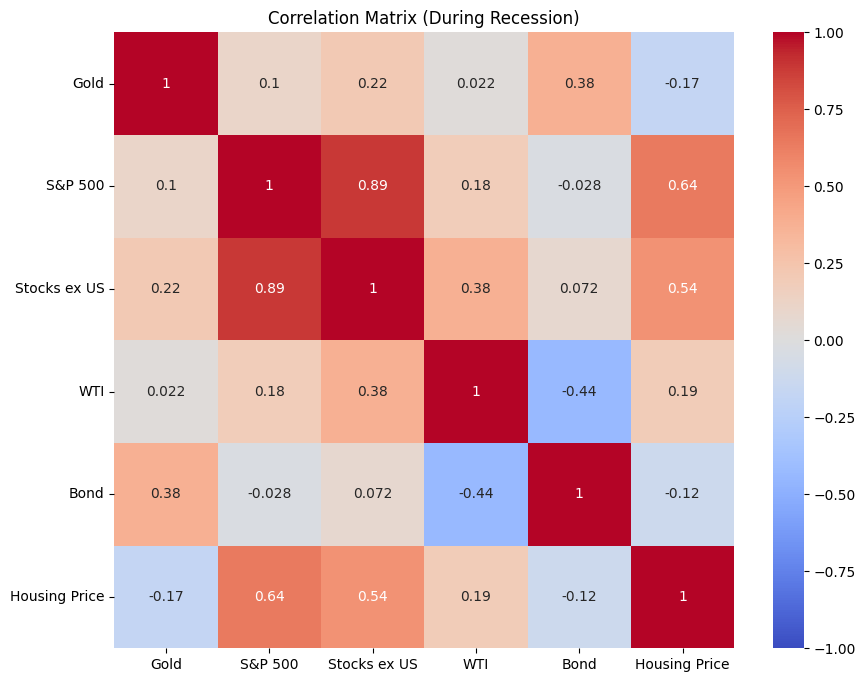

In [15]:
cm=returns.corr()
def h_map(df,con):    
    plt.figure(figsize=(10,8))
    sns.heatmap(df,annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Matrix ({con})')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.savefig(f'Correlation Matrix ({con}).png')
    plt.show()
h_map(cm,'During Recession')

In [81]:
# Redraw the SLR of gold & real interest rate with Fed Decisions
df = pd.read_csv('Real Interest Rate vs Gold Price.csv')
df

,Unnamed: 0,DATE,DFF,CPI,Real Interest Rate,Close,Return,Date,RIR_diff,DFF_diff,CPI_diff
0,0,2004-10-01,1.760968,3.19091,-1.429942,428.500000,0.023406,2004-10-01,-0.495772,0.155968,0.65174
1,1,2004-11-01,1.932000,3.62162,-1.689620,451.299988,0.053209,2004-11-01,-0.259678,0.171032,0.43071
2,2,2004-12-01,2.156129,3.34232,-1.186191,437.500000,-0.030578,2004-12-01,0.503429,0.224129,-0.27930
3,3,2005-01-01,2.279355,2.84487,-0.565515,421.799988,-0.035886,2005-01-01,0.620676,0.123226,-0.49745
4,4,2005-02-01,2.501786,3.05303,-0.551244,436.500000,0.034851,2005-02-01,0.014271,0.222431,0.20816
...,...,...,...,...,...,...,...,...,...,...,...
199,199,2024-03-01,5.330000,3.47513,1.854870,2217.399902,0.083932,2024-03-01,-0.309390,0.000000,0.30939
200,200,2024-04-01,5.330000,3.35773,1.972270,2291.399902,0.033372,2024-04-01,0.117400,0.000000,-0.11740
201,201,2024-05-01,5.330000,3.25021,2.079790,2322.899902,0.013747,2024-05-01,0.107520,0.000000,-0.10752
202,202,2024-06-01,5.330000,2.97563,2.354370,2327.699951,0.002066,2024-06-01,0.274580,0.000000,-0.27458


In [4]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Return ~ RIR_diff', data=df)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04137
Date:                Wed, 04 Sep 2024   Prob (F-statistic):              0.839
Time:                        15:22:45   Log-Likelihood:                 328.94
No. Observations:                 204   AIC:                            -653.9
Df Residuals:                     202   BIC:                            -647.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0108      0.003      3.168      0.002       0.004       0.017
RIR_diff       0.0014      0.007      0.203      0.839      -0.012       0.015
==============================================================================
Omnibus:                        0.298   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.439
Skew:                           0.063   Prob(JB):                        0.803
Kurtosis:                       2.812   Cond. No.                         2.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

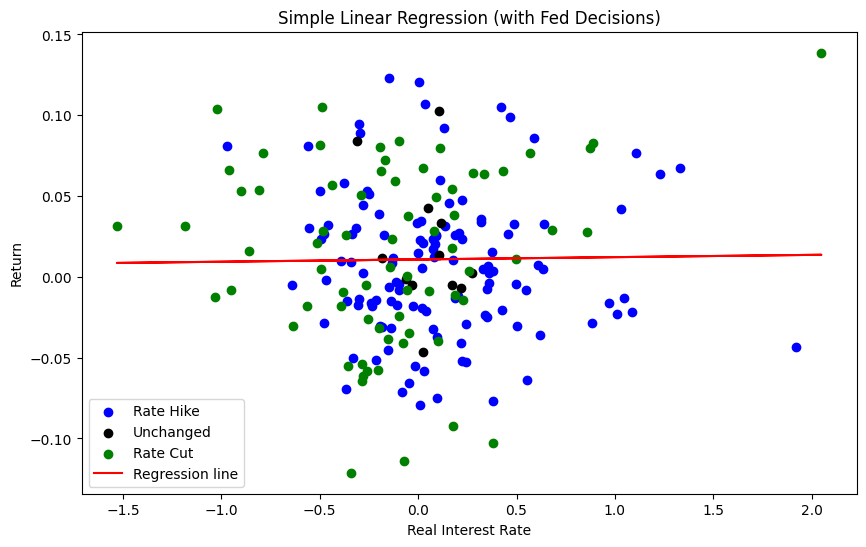

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RIR_diff'][df['DFF_diff']>0], df['Return'][df['DFF_diff']>0], color='blue', label='Rate Hike')
plt.scatter(df['RIR_diff'][df['DFF_diff']==0], df['Return'][df['DFF_diff']==0], color='black', label='Unchanged')
plt.scatter(df['RIR_diff'][df['DFF_diff']<0], df['Return'][df['DFF_diff']<0], color='green', label='Rate Cut')
plt.plot(df['RIR_diff'], result_slr.predict(df['RIR_diff']), color='red', label='Regression line')

plt.legend()
plt.xlabel('Real Interest Rate')
plt.ylabel('Return')
plt.title('Simple Linear Regression (with Fed Decisions)')

plt.savefig('SLR3.png')
plt.show()

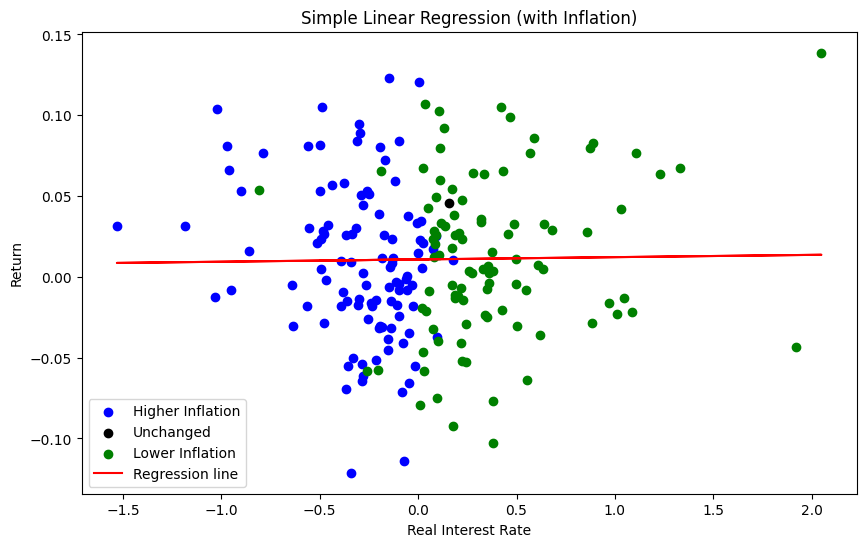

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RIR_diff'][df['CPI_diff']>0], df['Return'][df['CPI_diff']>0], color='blue', label='Higher Inflation')
plt.scatter(df['RIR_diff'][df['CPI_diff']==0], df['Return'][df['CPI_diff']==0], color='black', label='Unchanged')
plt.scatter(df['RIR_diff'][df['CPI_diff']<0], df['Return'][df['CPI_diff']<0], color='green', label='Lower Inflation')
plt.plot(df['RIR_diff'], result_slr.predict(df['RIR_diff']), color='red', label='Regression line')

plt.legend()
plt.xlabel('Real Interest Rate')
plt.ylabel('Return')
plt.title('Simple Linear Regression (with Inflation)')

plt.savefig('SLR4.png')
plt.show()

In [72]:
import yfinance as yf
gold = yf.download('GC=F', end='2024-08-27', interval='1d')['Close']
vix = yf.download('^VIX', end='2024-08-27', interval='1d')['Close']
skew = yf.download('^SKEW', end='2024-08-27', interval='1d')['Close']

C:\Users\jason wang\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\jason wang\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\jason wang\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********

In [73]:
df = pd.concat([gold,vix,skew], ignore_index=True, axis=1, join='outer')
df.reset_index(inplace=True)
df.rename(columns={'Date':'DATE'},inplace=True)
df.rename(columns={0:'Gold', 1:'VIX',2:'SKEW'},inplace=True)
# Loop through each asset column
for column in df.iloc[:,1:].columns:
    # Calculate the percentage change (returns) for each asset
    df[f'{column}_returns'] = df[column].pct_change()
df.dropna(inplace=True)
df.to_csv('Gold Price & VIX.csv')
df

C:\Users\jason wang\AppData\Local\Temp\ipykernel_26640\3427613142.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{column}_returns'] = df[column].pct_change()
C:\Users\jason wang\AppData\Local\Temp\ipykernel_26640\3427613142.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{column}_returns'] = df[column].pct_change()
C:\Users\jason wang\AppData\Local\Temp\ipykernel_26640\3427613142.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or s

,DATE,Gold,VIX,SKEW,Gold_returns,VIX_returns,SKEW_returns
1,2000-08-31,278.299988,16.840000,112.650002,0.016064,-0.048050,0.015963
2,2000-09-01,277.000000,17.530001,114.500000,-0.004671,0.040974,0.016423
3,2000-09-05,275.799988,19.820000,112.500000,-0.004332,0.130633,-0.017467
4,2000-09-06,274.200012,20.790001,110.440002,-0.005801,0.048941,-0.018311
5,2000-09-07,274.000000,19.420000,112.330002,-0.000729,-0.065897,0.017113
...,...,...,...,...,...,...,...
6014,2024-08-20,2511.300049,15.880000,146.259995,0.003797,0.083959,0.033640
6015,2024-08-21,2508.399902,16.270000,149.669998,-0.001155,0.024559,0.023315
6016,2024-08-22,2478.899902,17.549999,154.160004,-0.011760,0.078672,0.029999
6017,2024-08-23,2508.399902,15.860000,153.949997,0.011900,-0.096296,-0.001362


In [50]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
def ad_full(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print(dfoutput)
ad_full(df['Gold'])
ad_full(df['VIX'])
ad_full(df['SKEW'])
ad_full(df['Gold_returns'])
ad_full(df['VIX_returns'])
ad_full(df['SKEW_returns'])

Test Statistic                    0.261809
p-value                           0.975523
Lags Used                        11.000000
Number of Observations Used    5890.000000
dtype: float64
Test Statistic                   -4.828002
p-value                           0.000048
Lags Used                        34.000000
Number of Observations Used    5867.000000
dtype: float64
Test Statistic                   -3.876066
p-value                           0.002218
Lags Used                        31.000000
Number of Observations Used    5870.000000
dtype: float64
Test Statistic                  -24.583218
p-value                           0.000000
Lags Used                        10.000000
Number of Observations Used    5891.000000
dtype: float64
Test Statistic                  -26.594703
p-value                           0.000000
Lags Used                         9.000000
Number of Observations Used    5892.000000
dtype: float64
Test Statistic                -1.672605e+01
p-value              

In [116]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Gold_returns~VIX_returns ', data=df)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Gold_returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1271
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.722
Time:                        15:13:56   Log-Likelihood:                 18216.
No. Observations:                5873   AIC:                        -3.643e+04
Df Residuals:                    5871   BIC:                        -3.642e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0004      0.000      2.838      0.005       0.000       0.001
VIX_returns     0.0007      0.002      0.356      0.722      -0.003       0.005
==============================================================================
Omnibus:                      715.045   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6639.850
Skew:                          -0.218   Prob(JB):                         0.00
Kurtosis:                       8.191   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Gold_returns~SKEW_returns', data=df)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Gold_returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.650
Date:                Mon, 09 Sep 2024   Prob (F-statistic):             0.0311
Time:                        15:21:20   Log-Likelihood:                 18219.
No. Observations:                5873   AIC:                        -3.643e+04
Df Residuals:                    5871   BIC:                        -3.642e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0004      0.000      2.883      0.004       0.000       0.001
SKEW_returns    -0.0122      0.006     -2.156      0.031      -0.023      -0.001
==============================================================================
Omnibus:                      714.989   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6654.667
Skew:                          -0.216   Prob(JB):                         0.00
Kurtosis:                       8.197   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

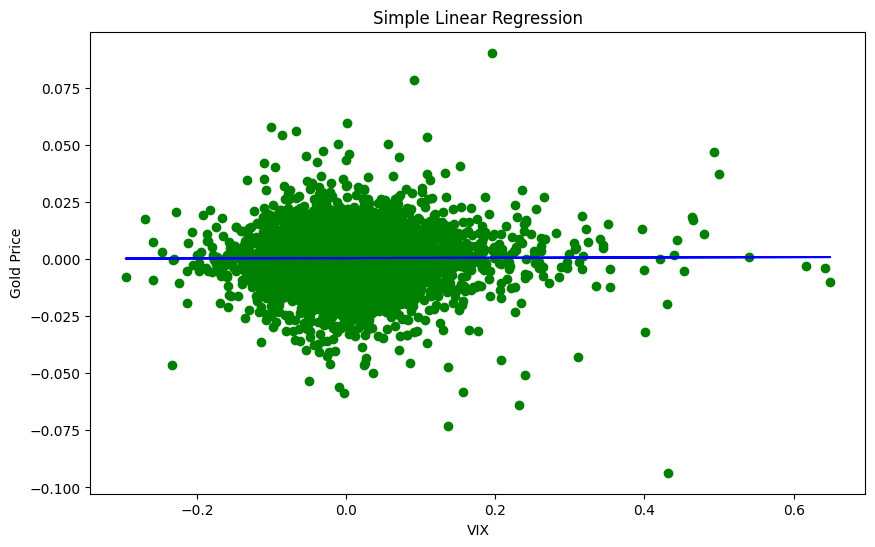

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(df['VIX_returns'], df['Gold_returns'], color='green', label='Data points')
plt.plot(df['VIX_returns'], result_slr.predict(df['VIX_returns']), color='blue', label='Regression line')

plt.xlabel('VIX')
plt.ylabel('Gold Price')
plt.title('Simple Linear Regression')

plt.savefig('SLR_VIX.png')
plt.show()

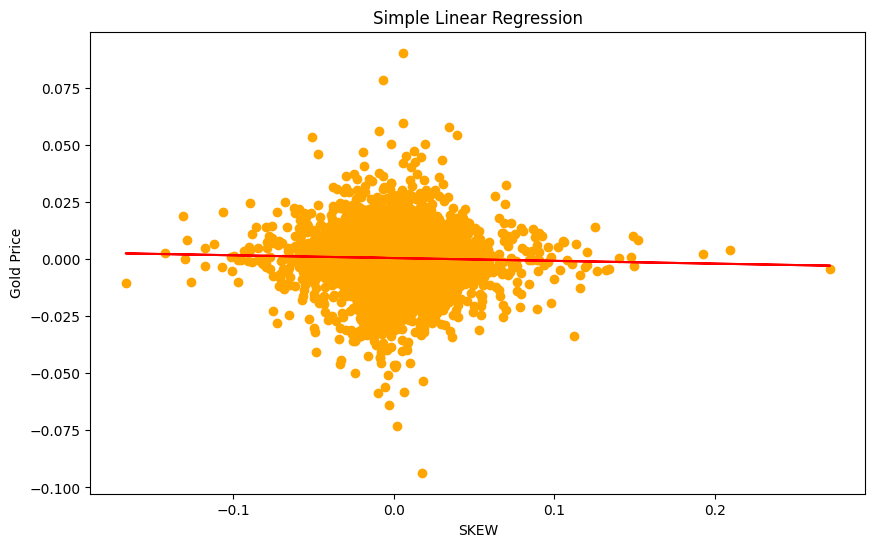

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SKEW_returns'], df['Gold_returns'], color='orange', label='Data points')
plt.plot(df['SKEW_returns'], result_slr.predict(df['SKEW_returns']), color='red', label='Regression line')

plt.xlabel('SKEW')
plt.ylabel('Gold Price')
plt.title('Simple Linear Regression')

plt.savefig('SLR_SKEW.png')
plt.show()

In [41]:
from statsmodels.tsa.api import VAR
var = VAR(df[['Gold_returns', 'VIX_returns']])
result_var = var.fit(maxlags=5, ic='aic')
result_var.summary()

C:\Users\jason wang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2024
Time:                     16:09:41
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.2347
Nobs:                     6012.00    HQIC:                  -14.2420
Log likelihood:           25771.8    FPE:                6.50272e-07
AIC:                     -14.2459    Det(Omega_mle):     6.49192e-07
--------------------------------------------------------------------
Results for equation Gold_returns
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.000448         0.000140            3.198           0.001
L1.Gold_returns        -0.012882         0.012902           -0.998           0.318
L1.VIX_returns         -0.008656         0.00

In [51]:
from statsmodels.tsa.api import VAR
var = VAR(df[['Gold_returns', 'SKEW_returns']])
result_var = var.fit(maxlags=5, ic='aic')
result_var.summary()

C:\Users\jason wang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Sep, 2024
Time:                     16:33:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.4939
Nobs:                     5897.00    HQIC:                  -16.5102
Log likelihood:           31992.9    FPE:                6.69808e-08
AIC:                     -16.5189    Det(Omega_mle):     6.67316e-08
--------------------------------------------------------------------
Results for equation Gold_returns
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.000390         0.000142            2.741           0.006
L1.Gold_returns        -0.012059         0.013037           -0.925           0.355
L1.SKEW_returns         0.007869         0.00

In [42]:
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

result = coint_johansen(df[['Gold_returns', 'VIX_returns']], det_order=0, k_ar_diff=2)
print("Eigenvalues:")
print(result.eig)

# 跟踪统计量
print("\nTrace Statistic:")
print(result.lr1)

# 跟踪统计量的临界值
print("\nCritical Values for Trace Statistic:")
print(result.cvt)

# 最大特征根统计量
print("\nMaximum Eigenvalue Statistic:")
print(result.lr2)

# 最大特征根统计量的临界值
print("\nCritical Values for Maximum Eigenvalue Statistic:")
print(result.cvm)

# 特征向量矩阵
print("\nEigenvectors:")
print(result.evec)

Eigenvalues:
[0.27630426 0.24764165]

Trace Statistic:
[3654.2477294 1710.385183 ]

Critical Values for Trace Statistic:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Maximum Eigenvalue Statistic:
[1943.8625464 1710.385183 ]

Critical Values for Maximum Eigenvalue Statistic:
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]

Eigenvectors:
[[  2.67363936 161.49761337]
 [ 24.80983948   0.23734214]]


In [52]:
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

result = coint_johansen(df[['Gold_returns', 'SKEW_returns']], det_order=0, k_ar_diff=5)
print("Eigenvalues:")
print(result.eig)

# 跟踪统计量
print("\nTrace Statistic:")
print(result.lr1)

# 跟踪统计量的临界值
print("\nCritical Values for Trace Statistic:")
print(result.cvt)

# 最大特征根统计量
print("\nMaximum Eigenvalue Statistic:")
print(result.lr2)

# 最大特征根统计量的临界值
print("\nCritical Values for Maximum Eigenvalue Statistic:")
print(result.cvm)

# 特征向量矩阵
print("\nEigenvectors:")
print(result.evec)

Eigenvalues:
[0.20319358 0.15187876]

Trace Statistic:
[2310.49611616  971.25797591]

Critical Values for Trace Statistic:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Maximum Eigenvalue Statistic:
[1339.23814026  971.25797591]

Critical Values for Maximum Eigenvalue Statistic:
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]

Eigenvectors:
[[   8.94450151 -227.40399527]
 [-146.98355617   -8.74958527]]


In [43]:
vecm = VECM(df[['Gold_returns', 'VIX_returns']], k_ar_diff=2, coint_rank=2)
vecm_fit = vecm.fit()
vecm_fit.summary()

C:\Users\jason wang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,coef,std err,z,P>|z|,[0.025,0.975]
L1.Gold_returns,-0.0129,0.018,-0.705,0.481,-0.049,0.023
L1.VIX_returns,-0.0023,0.003,-0.845,0.398,-0.008,0.003
L2.Gold_returns,-0.0150,0.013,-1.163,0.245,-0.040,0.010
L2.VIX_returns,-0.0031,0.002,-1.636,0.102,-0.007,0.001
,coef,std err,z,P>|z|,[0.025,0.975]
L1.Gold_returns,0.0005,0.126,0.004,0.997,-0.246,0.247
L1.VIX_returns,0.0561,0.019,2.954,0.003,0.019,0.093
L2.Gold_returns,-0.0101,0.088,-0.114,0.909,-0.183,0.163
L2.VIX_returns,0.0175,0.013,1.353,0.176,-0.008,0.043
,coef,std err,z,P>|z|,[0.025,0.975]


In [53]:
vecm = VECM(df[['Gold_returns', 'SKEW_returns']], k_ar_diff=5, coint_rank=2)
vecm_fit = vecm.fit()
vecm_fit.summary()

C:\Users\jason wang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,coef,std err,z,P>|z|,[0.025,0.975]
L1.Gold_returns,0.0255,0.029,0.869,0.385,-0.032,0.083
L1.SKEW_returns,-0.0289,0.019,-1.549,0.121,-0.066,0.008
L2.Gold_returns,0.0224,0.026,0.854,0.393,-0.029,0.074
L2.SKEW_returns,-0.0168,0.016,-1.043,0.297,-0.048,0.015
L3.Gold_returns,0.0302,0.023,1.330,0.184,-0.014,0.075
L3.SKEW_returns,-0.0170,0.013,-1.291,0.197,-0.043,0.009
L4.Gold_returns,0.0305,0.019,1.648,0.099,-0.006,0.067
L4.SKEW_returns,-0.0114,0.010,-1.153,0.249,-0.031,0.008
L5.Gold_returns,0.0417,0.013,3.207,0.001,0.016,0.067
L5.SKEW_returns,-0.0036,0.006,-0.599,0.549,-0.015,0.008


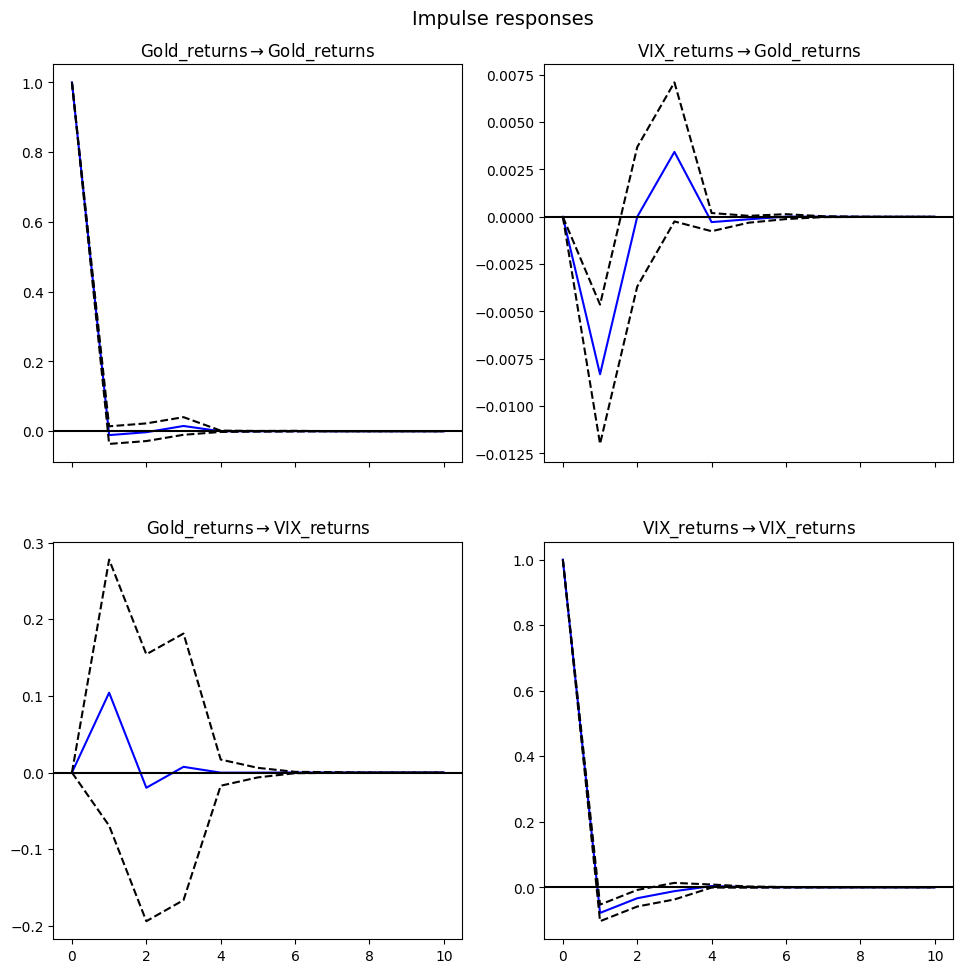

In [44]:
irf = vecm_fit.irf(10)
irf.plot(orth=False)

plt.savefig('Impulse Responses VIX.png')
plt.show()

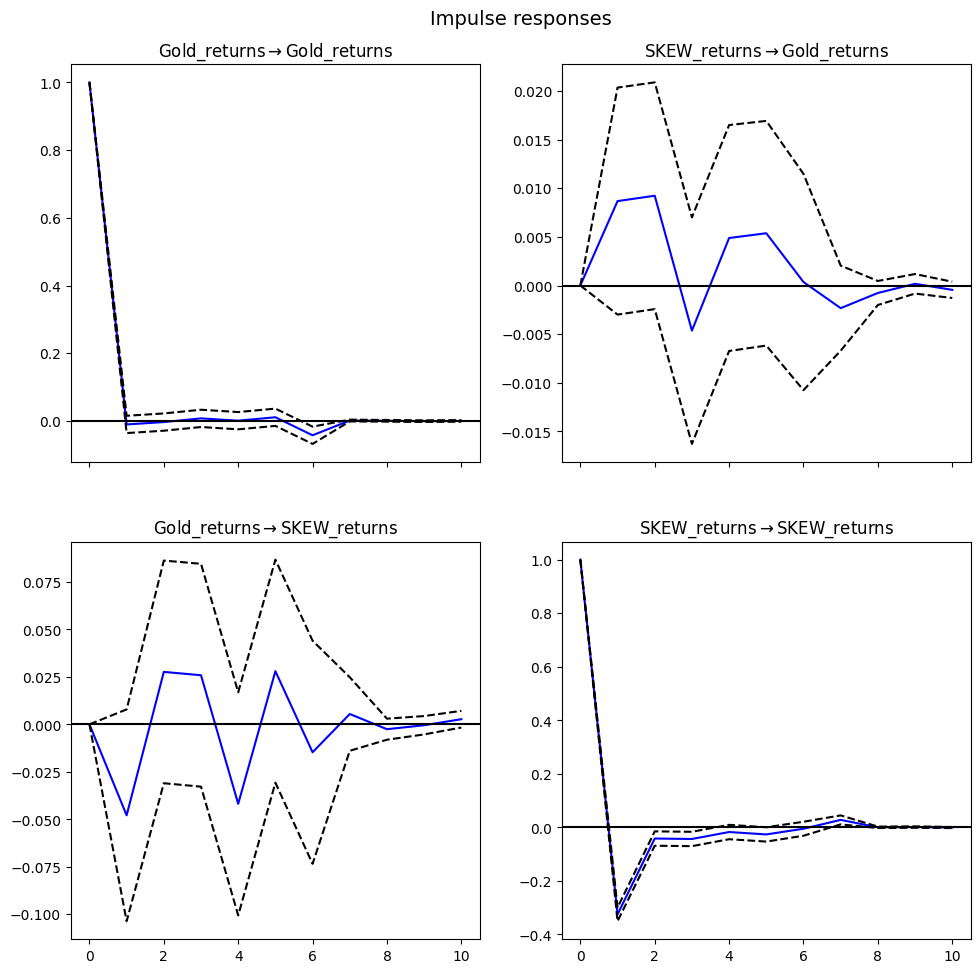

In [54]:
irf = vecm_fit.irf(10)
irf.plot(orth=False)

plt.savefig('Impulse Responses SKEW.png')
plt.show()

In [3]:
df = pd.read_csv('Gold Price & VIX.csv')

In [74]:
df['gold_std']= df['Gold_returns'].rolling(window=30).std()
df['vix_std']= df['VIX_returns'].rolling(window=30).std()
df['skew_std']= df['SKEW_returns'].rolling(window=30).std()
df['skew_rolling_m']=df['SKEW_returns'].rolling(window=30).mean()
df['vix_rolling_m']=df['VIX_returns'].rolling(window=30).mean()
df['gold_rolling_m']=df['Gold_returns'].rolling(window=30).mean()
df.dropna(inplace=True)

In [23]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
def ad_full(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print(dfoutput)
ad_full(df['gold_std'])
ad_full(df['vix_std'])
ad_full(df['skew_std'])

Test Statistic                   -4.774703
p-value                           0.000061
Lags Used                        33.000000
Number of Observations Used    5839.000000
dtype: float64
Test Statistic                -6.518317e+00
p-value                        1.057581e-08
Lags Used                      3.400000e+01
Number of Observations Used    5.838000e+03
dtype: float64
Test Statistic                   -4.907059
p-value                           0.000034
Lags Used                        32.000000
Number of Observations Used    5840.000000
dtype: float64


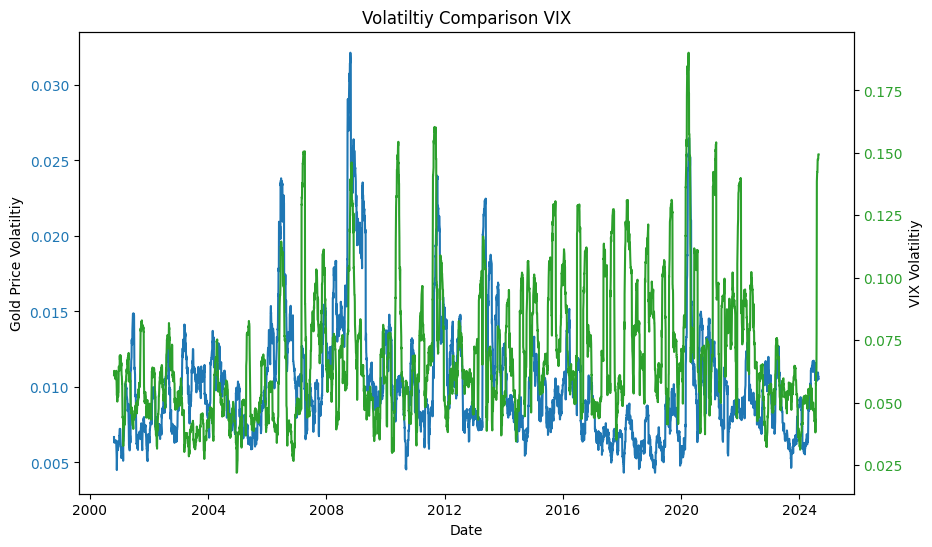

In [66]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:blue'
ax1.plot(df['DATE'], df['gold_std'],color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price Volatiltiy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.plot(df['DATE'], df['vix_std'],color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('VIX Volatiltiy')

plt.title('Volatiltiy Comparison VIX')
plt.savefig('Volatiltiy Comparison VIX.png')
plt.show()

In [125]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Gold_returns ~ vix_std', data=df)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Gold_returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4041
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.525
Time:                        15:21:46   Log-Likelihood:                 18217.
No. Observations:                5873   AIC:                        -3.643e+04
Df Residuals:                    5871   BIC:                        -3.642e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.626      0.104      -0.000       0.001
vix_std       -0.0034      0.005     -0.636      0.525      -0.014       0.007
==============================================================================
Omnibus:                      709.853   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6606.742
Skew:                          -0.208   Prob(JB):                         0.00
Kurtosis:                       8.179   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

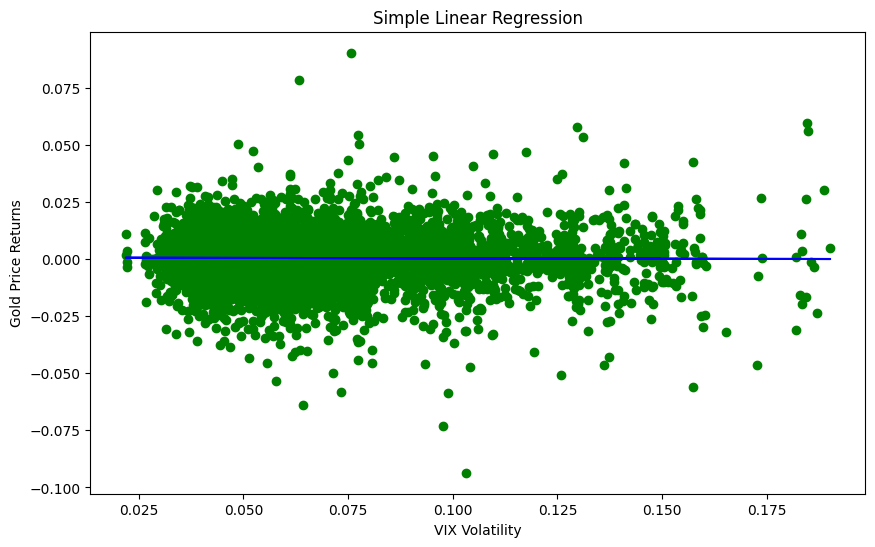

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(df['vix_std'], df['Gold_returns'], color='green', label='Data points')
plt.plot(df['vix_std'], result_slr.predict(df['vix_std']), color='blue', label='Regression line')

plt.xlabel('VIX Volatility')
plt.ylabel('Gold Price Returns')
plt.title('Simple Linear Regression')

plt.savefig('SLR_Vol_VIX_G.png')
plt.show()

In [127]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Gold_returns ~ skew_std', data=df)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Gold_returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01064
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.918
Time:                        15:23:12   Log-Likelihood:                 18216.
No. Observations:                5873   AIC:                        -3.643e+04
Df Residuals:                    5871   BIC:                        -3.642e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.000      1.115      0.265      -0.000       0.001
skew_std       0.0014      0.013      0.103      0.918      -0.025       0.027
==============================================================================
Omnibus:                      712.494   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6607.954
Skew:                          -0.214   Prob(JB):                         0.00
Kurtosis:                       8.179   Cond. No.                         93.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

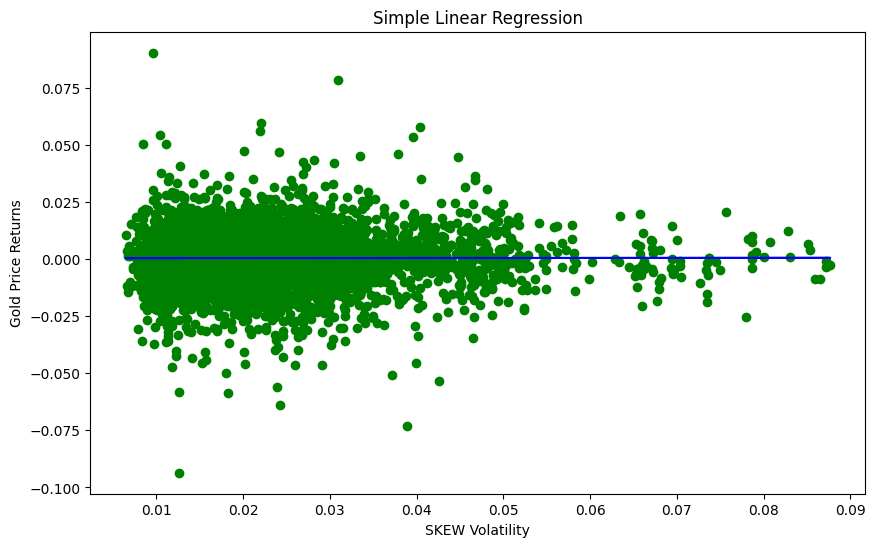

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(df['skew_std'], df['Gold_returns'], color='green', label='Data points')
plt.plot(df['skew_std'], result_slr.predict(df['skew_std']), color='blue', label='Regression line')

plt.xlabel('SKEW Volatility')
plt.ylabel('Gold Price Returns')
plt.title('Simple Linear Regression')

plt.savefig('SLR_Vol_SKEW_G.png')
plt.show()

In [75]:
df.to_csv('Gold Price & VIX.csv')
df

,DATE,Gold,VIX,SKEW,Gold_returns,VIX_returns,SKEW_returns,gold_std,vix_std,skew_std,skew_rolling_m,vix_rolling_m,gold_rolling_m
38,2000-10-24,270.100006,24.280001,115.029999,0.000000,-0.016606,-0.005447,0.006684,0.060985,0.013065,0.001308,0.010661,-0.000652
39,2000-10-25,266.200012,26.650000,113.860001,-0.014439,0.097611,-0.010171,0.006366,0.061940,0.012925,0.000437,0.015517,-0.001669
40,2000-10-26,264.899994,28.620001,113.190002,-0.004884,0.073921,-0.005884,0.006370,0.062695,0.012611,-0.000307,0.016615,-0.001676
41,2000-10-27,264.399994,26.469999,115.209999,-0.001888,-0.075122,0.017846,0.006350,0.061023,0.012602,0.000870,0.009756,-0.001594
42,2000-10-30,264.299988,25.459999,115.599998,-0.000378,-0.038156,0.003385,0.006303,0.061167,0.012075,0.001594,0.006853,-0.001413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2024-08-20,2511.300049,15.880000,146.259995,0.003797,0.083959,0.033640,0.010932,0.147561,0.027165,0.000148,0.029823,0.002259
6015,2024-08-21,2508.399902,16.270000,149.669998,-0.001155,0.024559,0.023315,0.010640,0.147491,0.027422,0.000547,0.030475,0.001692
6016,2024-08-22,2478.899902,17.549999,154.160004,-0.011760,0.078672,0.029999,0.010725,0.147754,0.027907,0.001240,0.032022,0.000895
6017,2024-08-23,2508.399902,15.860000,153.949997,0.011900,-0.096296,-0.001362,0.010528,0.149441,0.027814,0.001565,0.029106,0.001756


In [199]:
df2 = df[(df['VIX_returns']>(df['vix_rolling_m']+3*df['vix_std']))]
df2

,DATE,Gold,VIX,SKEW,Gold_returns,VIX_returns,SKEW_returns,gold_std,vix_std,skew_std,skew_rolling_m,vix_rolling_m,gold_rolling_m
131,2001-03-12,271.600006,30.320000,109.230003,0.002954,0.183450,-0.000091,0.009190,0.053560,0.008583,-0.000724,0.011208,0.001139
259,2001-09-17,289.799988,41.759998,110.900002,-0.001378,0.311558,-0.014222,0.006544,0.078883,0.009413,-0.001085,0.023311,0.000845
675,2003-05-19,364.200012,20.510000,111.000000,0.026783,0.114674,-0.004395,0.008727,0.037281,0.012175,0.000936,-0.010963,0.003809
1076,2004-12-27,445.200012,12.140000,115.029999,0.007468,0.081033,-0.023597,0.009189,0.026511,0.020393,0.001380,-0.002149,0.000891
1080,2005-01-03,428.700012,14.080000,118.379997,-0.020114,0.121019,0.014657,0.010359,0.038025,0.019905,0.002638,0.002800,-0.000830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,2021-11-26,1785.300049,28.620001,148.270004,0.000673,0.540366,0.000810,0.009197,0.105643,0.016304,0.001154,0.022017,-0.000171
5429,2022-04-22,1931.000000,28.209999,136.220001,-0.007147,0.243827,0.026371,0.009096,0.079413,0.020450,0.000721,-0.000558,-0.000434
5995,2024-07-24,2413.300049,18.040001,136.839996,0.003618,0.225544,-0.001168,0.010928,0.057919,0.030244,-0.000363,0.016088,0.000763
6002,2024-08-02,2425.699951,23.389999,139.649994,-0.003819,0.258203,0.021655,0.010807,0.077748,0.027205,-0.000413,0.020020,0.001277


In [189]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Gold_returns ~ vix_std', data=df2)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Gold_returns   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.4237
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.517
Time:                        16:08:48   Log-Likelihood:                 164.33
No. Observations:                  65   AIC:                            -324.7
Df Residuals:                      63   BIC:                            -320.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0039      0.008     -0.497      0.621      -0.019       0.012
vix_std        0.0640      0.098      0.651      0.517      -0.132       0.261
==============================================================================
Omnibus:                       49.753   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.964
Skew:                          -2.055   Prob(JB):                     4.37e-61
Kurtosis:                      12.260   Cond. No.                         40.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

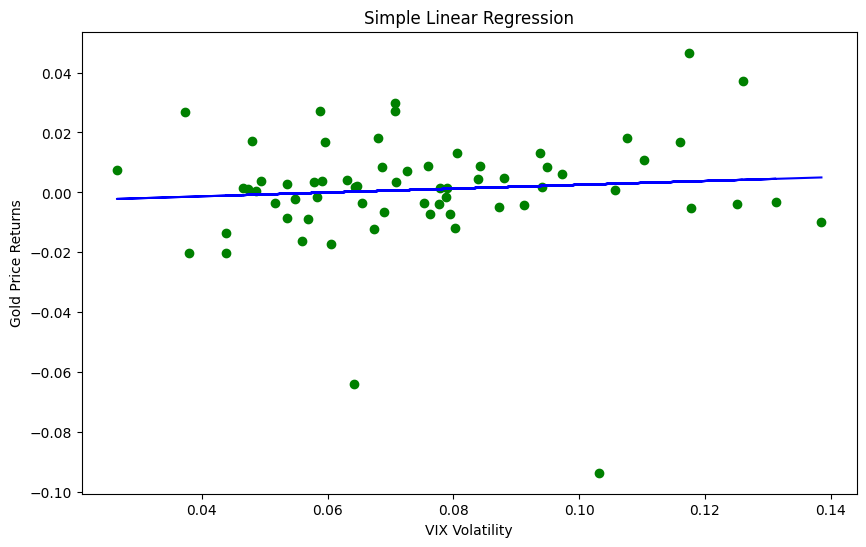

In [190]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['vix_std'], df2['Gold_returns'], color='green', label='Data points')
plt.plot(df2['vix_std'], result_slr.predict(df2['vix_std']), color='blue', label='Regression line')

plt.xlabel('VIX Volatility')
plt.ylabel('Gold Price Returns')
plt.title('Simple Linear Regression')

plt.savefig('SLR_Vol_VIX_GS.png')
plt.show()

In [201]:
df3 = df[(df['VIX_returns']>(df['vix_rolling_m']+3*df['vix_std']))|(df['VIX_returns']<(df['vix_rolling_m']-3*df['vix_std']))]
df3

,DATE,Gold,VIX,SKEW,Gold_returns,VIX_returns,SKEW_returns,gold_std,vix_std,skew_std,skew_rolling_m,vix_rolling_m,gold_rolling_m
131,2001-03-12,271.600006,30.320000,109.230003,0.002954,0.183450,-0.000091,0.009190,0.053560,0.008583,-0.000724,0.011208,0.001139
259,2001-09-17,289.799988,41.759998,110.900002,-0.001378,0.311558,-0.014222,0.006544,0.078883,0.009413,-0.001085,0.023311,0.000845
675,2003-05-19,364.200012,20.510000,111.000000,0.026783,0.114674,-0.004395,0.008727,0.037281,0.012175,0.000936,-0.010963,0.003809
1076,2004-12-27,445.200012,12.140000,115.029999,0.007468,0.081033,-0.023597,0.009189,0.026511,0.020393,0.001380,-0.002149,0.000891
1080,2005-01-03,428.700012,14.080000,118.379997,-0.020114,0.121019,0.014657,0.010359,0.038025,0.019905,0.002638,0.002800,-0.000830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,2021-11-26,1785.300049,28.620001,148.270004,0.000673,0.540366,0.000810,0.009197,0.105643,0.016304,0.001154,0.022017,-0.000171
5429,2022-04-22,1931.000000,28.209999,136.220001,-0.007147,0.243827,0.026371,0.009096,0.079413,0.020450,0.000721,-0.000558,-0.000434
5995,2024-07-24,2413.300049,18.040001,136.839996,0.003618,0.225544,-0.001168,0.010928,0.057919,0.030244,-0.000363,0.016088,0.000763
6002,2024-08-02,2425.699951,23.389999,139.649994,-0.003819,0.258203,0.021655,0.010807,0.077748,0.027205,-0.000413,0.020020,0.001277


In [202]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='Gold_returns ~ vix_std', data=df3)
result_slr=reg.fit()
result_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Gold_returns   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.3995
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.530
Time:                        17:20:35   Log-Likelihood:                 173.12
No. Observations:                  68   AIC:                            -342.2
Df Residuals:                      66   BIC:                            -337.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0035      0.007     -0.470      0.640      -0.018       0.011
vix_std        0.0602      0.095      0.632      0.530      -0.130       0.250
==============================================================================
Omnibus:                       51.959   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.781
Skew:                          -2.074   Prob(JB):                     8.90e-68
Kurtosis:                      12.580   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

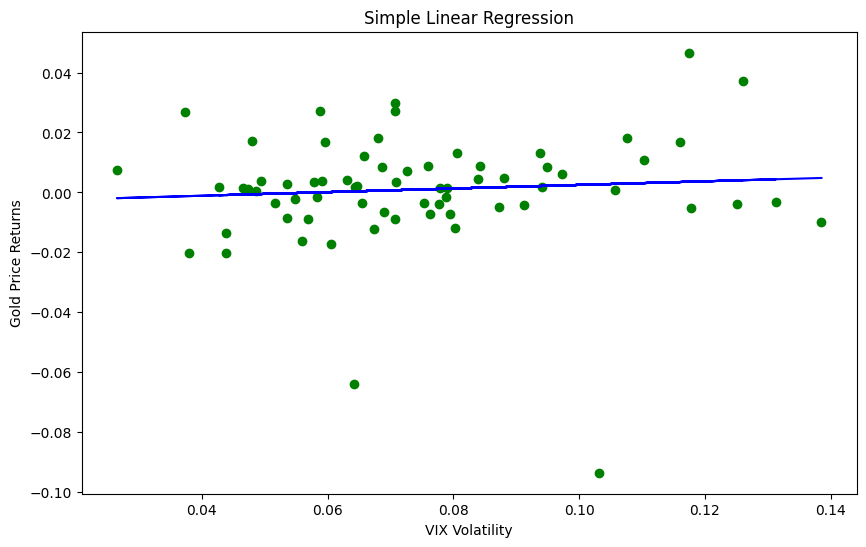

In [203]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['vix_std'], df3['Gold_returns'], color='green', label='Data points')
plt.plot(df3['vix_std'], result_slr.predict(df3['vix_std']), color='blue', label='Regression line')

plt.xlabel('VIX Volatility')
plt.ylabel('Gold Price Returns')
plt.title('Simple Linear Regression')

plt.savefig('SLR_Vol_VIX_GS2.png')
plt.show()

In [14]:
df = pd.read_csv('Gold Price & VIX.csv')
df2 = df[(df['VIX_returns']>(df['vix_rolling_m']+3*df['vix_std']))]
df['DATE'] = pd.to_datetime(df['DATE'])
df2['DATE'] = pd.to_datetime(df2['DATE'])
df2

C:\Users\jason wang\AppData\Local\Temp\ipykernel_37292\2348620977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DATE'] = pd.to_datetime(df2['DATE'])


,Unnamed: 0,DATE,Gold,VIX,SKEW,Gold_returns,VIX_returns,SKEW_returns,gold_std,vix_std,skew_std,skew_rolling_m,vix_rolling_m,gold_rolling_m
93,131,2001-03-12,271.600006,30.320000,109.230003,0.002954,0.183450,-0.000091,0.009190,0.053560,0.008583,-0.000724,0.011208,0.001139
220,259,2001-09-17,289.799988,41.759998,110.900002,-0.001378,0.311558,-0.014222,0.006544,0.078883,0.009413,-0.001085,0.023311,0.000845
636,675,2003-05-19,364.200012,20.510000,111.000000,0.026783,0.114674,-0.004395,0.008727,0.037281,0.012175,0.000936,-0.010963,0.003809
1035,1076,2004-12-27,445.200012,12.140000,115.029999,0.007468,0.081033,-0.023597,0.009189,0.026511,0.020393,0.001380,-0.002149,0.000891
1039,1080,2005-01-03,428.700012,14.080000,118.379997,-0.020114,0.121019,0.014657,0.010359,0.038025,0.019905,0.002638,0.002800,-0.000830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5258,5328,2021-11-26,1785.300049,28.620001,148.270004,0.000673,0.540366,0.000810,0.009197,0.105643,0.016304,0.001154,0.022017,-0.000171
5353,5429,2022-04-22,1931.000000,28.209999,136.220001,-0.007147,0.243827,0.026371,0.009096,0.079413,0.020450,0.000721,-0.000558,-0.000434
5853,5995,2024-07-24,2413.300049,18.040001,136.839996,0.003618,0.225544,-0.001168,0.010928,0.057919,0.030244,-0.000363,0.016088,0.000763
5859,6002,2024-08-02,2425.699951,23.389999,139.649994,-0.003819,0.258203,0.021655,0.010807,0.077748,0.027205,-0.000413,0.020020,0.001277


In [15]:
df

,Unnamed: 0,DATE,Gold,VIX,SKEW,Gold_returns,VIX_returns,SKEW_returns,gold_std,vix_std,skew_std,skew_rolling_m,vix_rolling_m,gold_rolling_m
0,38,2000-10-24,270.100006,24.280001,115.029999,0.000000,-0.016606,-0.005447,0.006684,0.060985,0.013065,0.001308,0.010661,-0.000652
1,39,2000-10-25,266.200012,26.650000,113.860001,-0.014439,0.097611,-0.010171,0.006366,0.061940,0.012925,0.000437,0.015517,-0.001669
2,40,2000-10-26,264.899994,28.620001,113.190002,-0.004884,0.073921,-0.005884,0.006370,0.062695,0.012611,-0.000307,0.016615,-0.001676
3,41,2000-10-27,264.399994,26.469999,115.209999,-0.001888,-0.075122,0.017846,0.006350,0.061023,0.012602,0.000870,0.009756,-0.001594
4,42,2000-10-30,264.299988,25.459999,115.599998,-0.000378,-0.038156,0.003385,0.006303,0.061167,0.012075,0.001594,0.006853,-0.001413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,6014,2024-08-20,2511.300049,15.880000,146.259995,0.003797,0.083959,0.033640,0.010932,0.147561,0.027165,0.000148,0.029823,0.002259
5869,6015,2024-08-21,2508.399902,16.270000,149.669998,-0.001155,0.024559,0.023315,0.010640,0.147491,0.027422,0.000547,0.030475,0.001692
5870,6016,2024-08-22,2478.899902,17.549999,154.160004,-0.011760,0.078672,0.029999,0.010725,0.147754,0.027907,0.001240,0.032022,0.000895
5871,6017,2024-08-23,2508.399902,15.860000,153.949997,0.011900,-0.096296,-0.001362,0.010528,0.149441,0.027814,0.001565,0.029106,0.001756


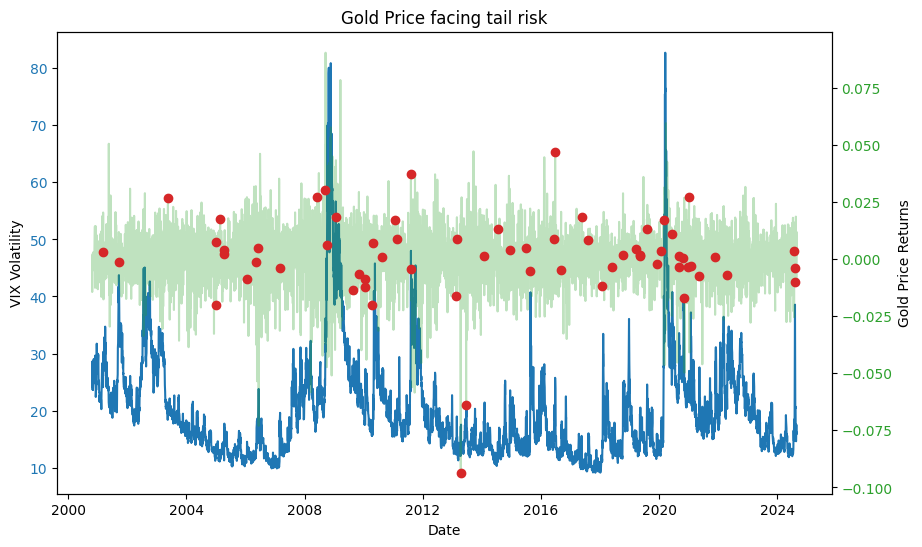

In [25]:
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.plot(df['DATE'], df['VIX'],color=color)
plt.xlabel('Date')
plt.ylabel('VIX Volatility')
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2 = ax1.twinx()
ax2.plot(df['DATE'], df['Gold_returns'],color=color,alpha=0.3)
ax2.scatter(df2['DATE'], df2['Gold_returns'],color='tab:red',zorder=2)
plt.ylabel('Gold Price Returns')
ax2.tick_params(axis='y', labelcolor=color)

import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Gold Price facing tail risk')
plt.savefig('Gold Price facing tail risk.png')
plt.show()

In [62]:
d5 = []
d10 = []
d20 = []
for date in df2['DATE']:
    base = df[df['DATE'] == date]['Gold']
    target_row = base.index[0]
    base = base.values
    if target_row + 5 <= len(df.iloc[target_row:]):
        d5.append(float((df[['Gold']].iloc[target_row + 5].values - base)/base))
    if target_row + 10 <= len(df.iloc[target_row:]):        
        d10.append(float((df[['Gold']].iloc[target_row + 10].values - base)/base))
    if target_row + 20 <= len(df.iloc[target_row:]):                
        d20.append(float((df[['Gold']].iloc[target_row + 20].values - base)/base))

C:\Users\jason wang\AppData\Local\Temp\ipykernel_37292\864123505.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d5.append(float((df[['Gold']].iloc[target_row + 5].values - base)/base))
C:\Users\jason wang\AppData\Local\Temp\ipykernel_37292\864123505.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d10.append(float((df[['Gold']].iloc[target_row + 10].values - base)/base))
C:\Users\jason wang\AppData\Local\Temp\ipykernel_37292\864123505.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operat

In [66]:
after_tail = pd.DataFrame()
after_tail['5d return'] = d5
after_tail['10d return'] = d10
after_tail['20d return'] = d20
after_tail

,5d return,10d return,20d return
0,-0.043446,-0.035714,-0.048969
1,-0.000345,0.008282,-0.026570
2,0.009885,0.002746,-0.002746
3,-0.037511,-0.052336,-0.041105
4,-0.022393,-0.012829,-0.018428
5,-0.003682,0.013349,-0.007365
6,0.013976,0.008619,-0.017936
7,0.022123,0.010826,-0.014121
8,0.009395,0.025113,-0.003071
9,-0.077480,-0.091093,-0.179580


In [85]:
df['Rolling_Returns_5D'] = df['Gold'].pct_change(periods=5)
df['Rolling_Returns_10D'] = df['Gold'].pct_change(periods=10)
df['Rolling_Returns_20D'] = df['Gold'].pct_change(periods=20)

In [86]:
print(after_tail.describe())
print(df[['Rolling_Returns_5D','Rolling_Returns_10D','Rolling_Returns_20D']].describe())

       5d return  10d return  20d return
count  27.000000   27.000000   27.000000
mean    0.004452    0.007195    0.009415
std     0.044578    0.059527    0.078336
min    -0.077480   -0.139777   -0.179580
25%    -0.025213   -0.034842   -0.022499
50%     0.005940    0.010826    0.016868
75%     0.021843    0.036810    0.061211
max     0.154259    0.134210    0.144044
       Rolling_Returns_5D  Rolling_Returns_10D  Rolling_Returns_20D
count         5868.000000          5863.000000          5853.000000
mean             0.002210             0.004396             0.008700
std              0.024380             0.033786             0.046544
min             -0.134478            -0.192277            -0.187308
25%             -0.011757            -0.015832            -0.020374
50%              0.002714             0.003769             0.007151
75%              0.016652             0.025155             0.038144
max              0.204236             0.184001             0.204686


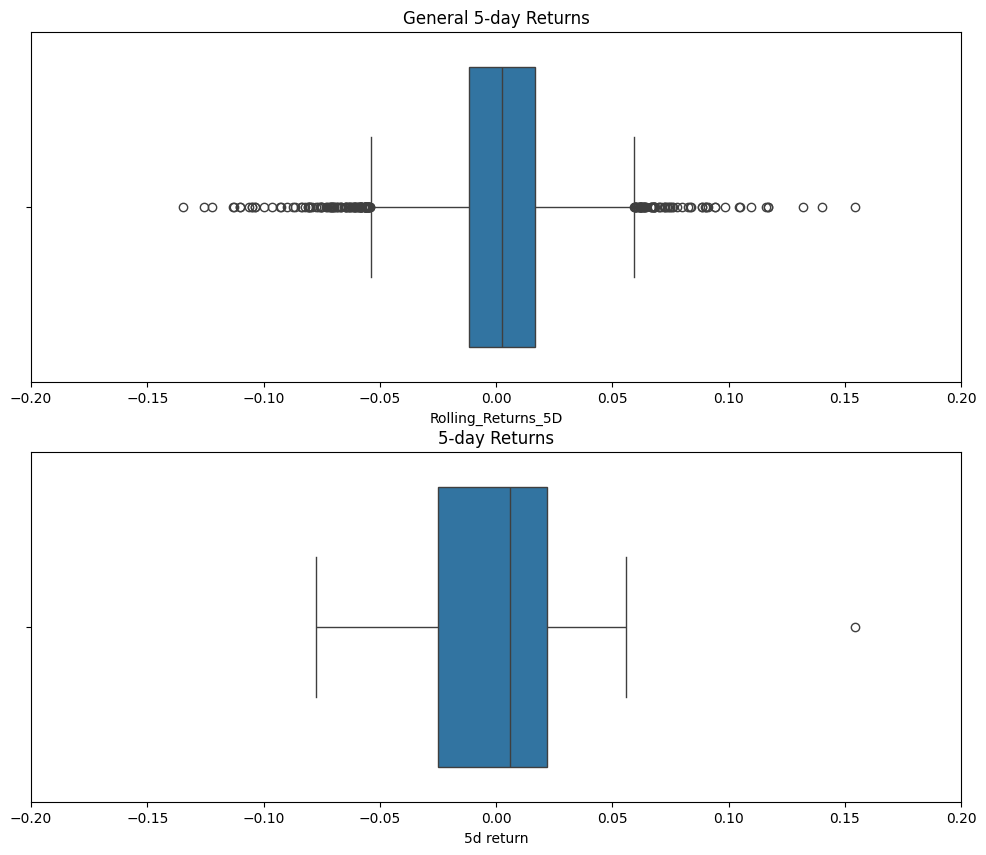

In [96]:
fig, axes = plt.subplots(2,1,figsize=(12, 10))

xlim = (-0.2,0.2)
sns.boxplot(x=df['Rolling_Returns_5D'],ax=axes[0])
sns.boxplot(x=after_tail['5d return'],ax=axes[1])

axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)

axes[0].set_title('General 5-day Returns')
axes[1].set_title('5-day Returns')

plt.savefig('boxplot 5-day.png')
plt.show()

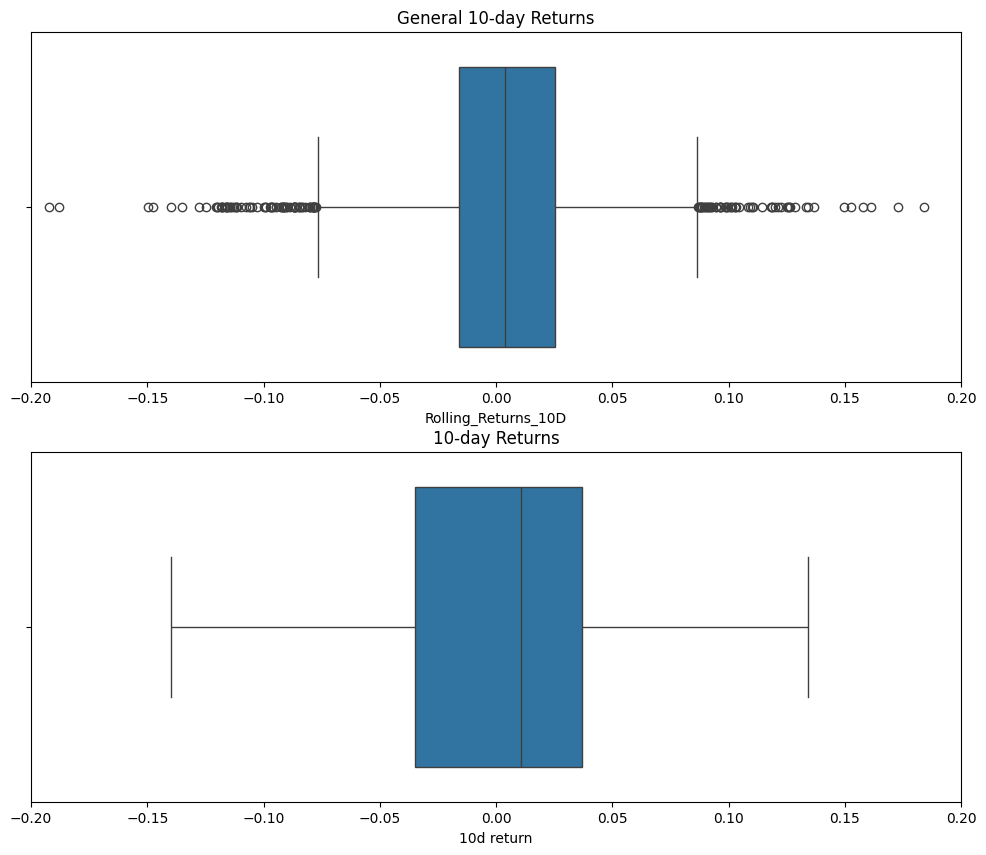

In [97]:
fig, axes = plt.subplots(2,1,figsize=(12, 10))

xlim = (-0.2,0.2)
sns.boxplot(x=df['Rolling_Returns_10D'],ax=axes[0])
sns.boxplot(x=after_tail['10d return'],ax=axes[1])

axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)

axes[0].set_title('General 10-day Returns')
axes[1].set_title('10-day Returns')

plt.savefig('boxplot 10-day.png')
plt.show()

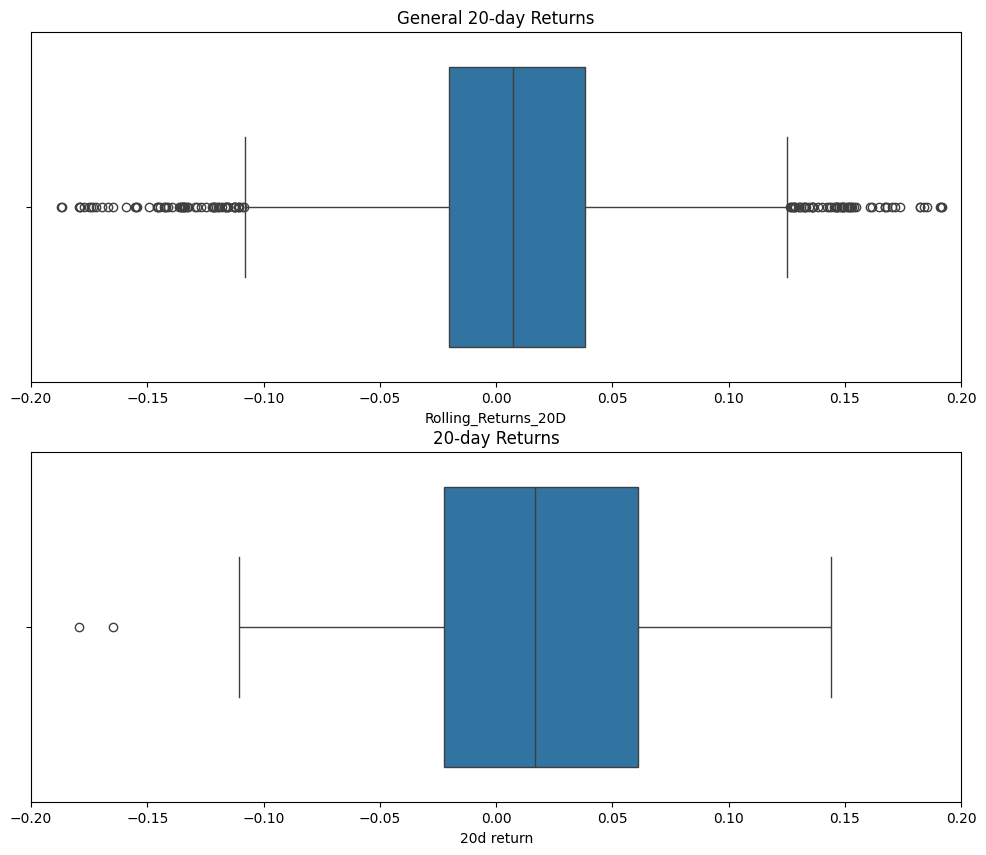

In [98]:
fig, axes = plt.subplots(2,1,figsize=(12, 10))

xlim = (-0.2,0.2)
sns.boxplot(x=df['Rolling_Returns_20D'],ax=axes[0])
sns.boxplot(x=after_tail['20d return'],ax=axes[1])

axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)

axes[0].set_title('General 20-day Returns')
axes[1].set_title('20-day Returns')

plt.savefig('boxplot 20-day.png')
plt.show()